# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [0]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
y = np.array([[1,1,0,0]]).T

In [2]:
y


array([[1],
       [1],
       [0],
       [0]])

In [0]:
i = np.random.seed(1)
i

### 參數定義

1. Dataset:

  X 輸入資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。

  y 輸出資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。



2. Layer

  Input : l0 網路第 1 層，即網路輸入層。

  Hidden Layer: l1 網路第 2 層，常稱作隱藏層。

  Weight: syn0 第一層權值，突觸 0 ，連接 l0 層與 l1 層。

逐元素相乘，故兩等長向量相乘等同於其對等元素分別相乘，結果為同等長度的向量。
– 元素相減，故兩等長向量相減等同於其對等元素分別相減，結果為同等長度的向量。

x.dot(y) 若 x 和 y 為向量，則進行點積操作；若均為矩陣，則進行矩陣相乘操作；若其中之一為矩陣，則進行向量與矩陣相乘操作。

In [0]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0; 注意內積相乘的矩陣, (列, 欄)
syn0 = 2*np.random.random((3,4)) - 1
# define syn1

iter = 0
syn0_history = [syn0]
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）

syn1 = 2*np.random.random((4,1)) - 1  #第二層隱層”間權重初值如何設?
syn1_history = [syn1]



In [14]:
print(X)
syn0

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]


array([[ 4.83409336, -2.49875389, -0.3765147 , -4.94371204],
       [-0.41802014, -0.47858772, -0.73102864,  0.1432464 ],
       [-1.73131575,  0.75060633, -0.33166688,  1.9600345 ]])

In [12]:
np.dot(l0,syn0)

array([[-1.73131575,  0.75060633, -0.33166688,  1.9600345 ],
       [-2.14933589,  0.2720186 , -1.06269552,  2.1032809 ],
       [ 3.10277761, -1.74814756, -0.70818158, -2.98367754],
       [ 2.68475747, -2.22673529, -1.43921022, -2.84043114]])

In [15]:
syn1

array([[-7.25816354],
       [ 2.64047159],
       [ 0.05361618],
       [ 6.39481464]])

In [26]:
i = np.array([[0,1],
             [2,1]])
j = np.array([[2],
              [3]])

print(i*j)
np.dot(i, j) #內積

[[0 2]
 [6 3]]


array([[3],
       [7]])

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [27]:
for j in range(60000):
 
    # Feed forward through layers 0, 1, and 2
    # l0 網路第 1 層，即網路輸入層。
    # l1 網路第 2 層，常稱作隱藏層。
    # l2 假定為網路最後一層，隨著訓練進行，其輸出應該逐漸接近正確結果
    
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
 
    # how much did we miss the target value?
    # l2_error 該值說明了神經網路預測時“丟失”的數目。
    # l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    # l1_error 該值為 l2_delta 經 syn1 加權後的結果，從而能夠計算得到中間層/隱層的誤差。
    # l1_delta 該值為經確信度加權後的神經網路 l1 層的誤差，除了確信誤差很小時，它近似等於 l1_error 。
    
    
    l2_error = y - l2
 
    if (j% 10000) == 0:
        print("L2_Error:" + str(np.mean(np.abs(l2_error))))
 
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)
 
    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    if (j% 10000) == 0:
        print("L1_Error:" + str(np.mean(np.abs(l1_error))))
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)
 
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
    syn1_history.append(syn1)
    syn0_history.append(syn0)

L2_Error:0.001849283876961519
L1_Error:1.4100891164238297e-05
L2_Error:0.001725204283792845
L1_Error:1.2373383268450302e-05
L2_Error:0.0016227894146408216
L1_Error:1.1026749524677776e-05
L2_Error:0.0015364123904864366
L1_Error:9.947217903770275e-06
L2_Error:0.0014622971889617221
L1_Error:9.062276930343165e-06
L2_Error:0.001397803617355755
L1_Error:8.323514949385953e-06


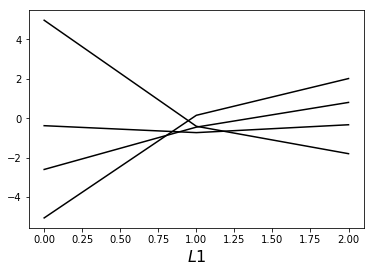

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

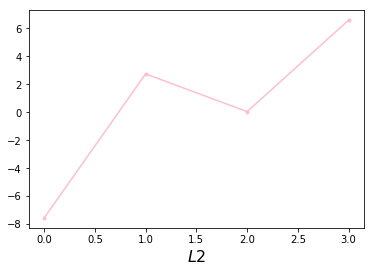

In [29]:
plt.plot(syn1_history[0], 'o-', ms=3, lw=1.5, color='pink')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()

In [30]:
print("Output After Training (根據 L1):")
print(l1)

Output After Training (根據 L1):
[[0.1420336  0.68984249 0.41768308 0.88171482]
 [0.09902819 0.58576861 0.2565929  0.8962002 ]
 [0.95946982 0.14205539 0.32913649 0.0454724 ]
 [0.94018194 0.09524554 0.19099554 0.05229307]]


In [31]:
print("Output After Training (根據 L2):")
print(l2)

Output After Training (根據 L2):
[[0.99871298]
 [0.99886594]
 [0.00143075]
 [0.00151228]]
